<h1><b>Reporte Escrito: Experimentos y análisis de algoritmos de ordenamiento.</b></h1>

<h1><b>Alumno: David Segundo Garcia</b></h1>

----



## **Introducción**

A lo largo de las últimas décadas se han realizado múltiples estudios para evaluar y mejorar la eficiencia de los algoritmos de ordenamiento, pues esta tarea es fundamental en la computación. Por ejemplo, investigaciones tempranas (Fosdick & Cline, 1974) realizaron exhaustivas pruebas de rendimiento de diversas variantes de quicksort, demostrando que pequeños ajustes en la implementación pueden tener un impacto significativo en el número de comparaciones y en el tiempo de ejecución. Estas pruebas sentaron las bases para posteriores estudios sobre optimización y adaptabilidad de los métodos de ordenamiento.

Por otro lado, el desarrollo de algoritmos adaptativos ha permitido aprovechar el orden parcial existente en los datos. Estivill-Castro y Wood (1992) destacan que los algoritmos adaptativos optimizan su desempeño en función del grado de desorden de la secuencia, lo cual es especialmente relevante para listas que se encuentran casi ordenadas. En este contexto, Cook y Kim (1980) demostraron que, para listas con una alta “sortedness”, algoritmos como el Straight Insertion Sort pueden superar a métodos más generales, mientras que para listas menos ordenadas se requieren técnicas más sofisticadas como Quickersort.

Finalmente, la introducción de estructuras de datos alternativas, como las skip lists, ha ofrecido soluciones simples y eficientes para mantener el orden de los datos sin necesidad de recurrir a estructuras complejas de equilibrio estricto. Pugh (1990) propuso que, mediante el uso de un mecanismo probabilístico para asignar niveles a los nodos, las skip lists logran un rendimiento comparable al de los árboles balanceados, pero con una implementación mucho más sencilla. Esta combinación de adaptabilidad y estructuras eficientes refleja el continuo esfuerzo por mejorar los métodos de ordenamiento en diversos contextos computacionales.



----

## **Instrucciones**:

1. **Implementa** y **compara** los siguientes algoritmos de ordenamiento:

   - Heapsort
   - Mergesort
   - Quicksort
   - Bubblesort
   - La estructura de datos **SkipList** y utilízala para ordenar

2. **Utiliza** los diferentes archivos proporcionados, los cuales tienen diferentes niveles de desorden y mide tanto el número de comparaciones como el tiempo necesario para ordenarlos.

3. Por cada archivo de datos, **compara** todos los métodos implementados mediante figuras o tablas de datos (número de comparaciones y tiempo por separado).

4. **Discute** tus resultados.

----

<h1><b>Solución</b></h1>

## **Punto 1**


**Implementa** y **compara** los siguientes algoritmos de ordenamiento:

   - Heapsort
   - Mergesort
   - Quicksort
   - Bubblesort
   - La estructura de datos **SkipList** y utilízala para ordenar

### Definimos las librerías que usaremos:

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import random
import zipfile

### Funcíon para cargar datos en la carpeta zip

In [ ]:
def cargar_datos_zip(ruta_zip: str) -> dict:
    """Carga datos JSON desde un archivo ZIP.

    Args:
        ruta_zip (str): Ruta del archivo ZIP que contiene archivos JSON.

    Returns:
        dict: Diccionario donde cada llave es el nombre del archivo
        JSON y el valor es el contenido decodificado.
    """
    datos = {}
    with zipfile.ZipFile(ruta_zip, 'r') as archivo_zip:
        for nombre in archivo_zip.namelist():
            if nombre.endswith('.json'):
                # Eliminamos la extensión .json
                base = os.path.splitext(nombre)[0]
                # Quitamos el prefijo 'listas-posteo-con-'
                base = base.replace("listas-posteo-con-", "")

                with archivo_zip.open(nombre) as archivo:
                    datos[base] = json.load(archivo)
    return datos


### Implementamos clases para el algoritmo SkipList

In [ ]:
class Nodo:
    """Representa un nodo en una SkipList.

    Args:
        valor (any): Valor a almacenar en el nodo.
        nivel (int): Nivel del nodo, que determina el número de
        punteros que tendrá.

    Attributes:
        valor (any): Valor almacenado en el nodo.
        siguientes (list): Lista de punteros a otros nodos en la SkipList.
    """
    def __init__(self, valor, nivel: int):
        self.valor = valor
        self.siguientes = [None] * (nivel + 1)


class SkipListOrden:
    """Implementa una SkipList para ordenar elementos.

    Args:
        max_nivel (int, optional): Máximo nivel permitido en la SkipList.
        Por defecto es 16.
        probabilidad (float, optional): Probabilidad para aumentar
        el nivel de un nodo. Por defecto es 0.5.

    Attributes:
        max_nivel (int): Valor máximo de nivel.
        probabilidad (float): Probabilidad de incrementar el nivel.
        nivel_actual (int): Nivel actual de la SkipList.
        cabeza (Nodo): Nodo cabeza de la SkipList.
        contador (int): Contador de comparaciones realizadas.
    """
    def __init__(self, max_nivel: int = 16, probabilidad: float = 0.5):
        self.max_nivel = max_nivel
        self.probabilidad = probabilidad
        self.nivel_actual = 0
        self.cabeza = Nodo(-float('inf'), max_nivel)
        self.contador = 0

    def insertar(self, valor) -> None:
        """Inserta un nuevo valor en la SkipList.

        Args:
            valor (any): Valor a insertar en la lista.

        Returns:
            None
        """
        self.contador += 1
        actual = self.cabeza
        actualizaciones = [self.cabeza] * (self.max_nivel + 1)

        for nivel in range(self.nivel_actual, -1, -1):
            while actual.siguientes[nivel] is not None and (
                actual.siguientes[nivel].valor < valor
            ):
                actual = actual.siguientes[nivel]

        nivel_nuevo = 0
        while nivel_nuevo < self.max_nivel and (
            random.random() < self.probabilidad
        ):
            nivel_nuevo += 1

        nuevo = Nodo(valor, nivel_nuevo)

        actual = self.cabeza
        for nivel in range(self.nivel_actual, -1, -1):
            while actual.siguientes[nivel] is not None and (
                actual.siguientes[nivel].valor < valor
            ):
                actual = actual.siguientes[nivel]
            actualizaciones[nivel] = actual

        if nivel_nuevo > self.nivel_actual:
            for i in range(self.nivel_actual + 1, nivel_nuevo + 1):
                actualizaciones[i] = self.cabeza
            self.nivel_actual = nivel_nuevo

        for i in range(nivel_nuevo + 1):
            nuevo.siguientes[i] = actualizaciones[i].siguientes[i]
            actualizaciones[i].siguientes[i] = nuevo

    def ordenar(self, lista: list) -> tuple:
        """Ordena una lista utilizando la SkipList.

        Args:
            lista (list): Lista de elementos a ordenar.

        Returns:
            tuple: Una tupla que contiene el número de
                  comparaciones realizadas.
        """
        for elem in lista:
            self.insertar(elem)
        resultado = []
        nodo = self.cabeza.siguientes[0]
        while nodo:
            resultado.append(nodo.valor)
            nodo = nodo.siguientes[0]
        return resultado, self.contador


### Clase para implementar los algoritmos de ordenamieno

In [ ]:
class AlgoritmosOrdenamiento:
    """Clase que contiene métodos para ordenar listas.

    Métodos:
        bubble_sort(lista: list) -> tuple: Ordena la lista con Bubble Sort.
        quick_sort(lista: list) -> tuple: Ordena la lista con Quick Sort.
        merge_sort(lista: list) -> tuple: Ordena la lista con Merge Sort.
        heap_sort(lista: list) -> tuple: Ordena la lista con Heap Sort.
    """

    # def bubble_sort(self, lista: list) -> tuple:
    #     """Ordena una lista utilizando el algoritmo Bubble Sort.

    #     Args:
    #         lista (list): Lista de elementos a ordenar.

    #     Returns:
    #         tuple: Una tupla que contiene la lista ordenada y
    #                el número de comparaciones realizadas.
    #     """
    #     copia = lista.copy()
    #     contador = 0
    #     n = len(copia)
    #     for i in range(n):
    #         for j in range(n - i - 1):
    #             contador += 1
    #             if copia[j] > copia[j + 1]:
    #                 copia[j], copia[j + 1] = copia[j + 1], copia[j]
    #     return copia, contador

    def bubble_sort(self, lista: list) -> tuple:
    """
    Ordena una lista utilizando el algoritmo Bubble Sort adaptativo.

    Args:
        lista (list): Lista de elementos a ordenar.

    Returns:
        tuple: Una tupla que contiene la lista ordenada y el número
               total de comparaciones realizadas.
    """
    copia = lista.copy()
    contador = 0
    n = len(copia)
    for i in range(n):
        cambiado = False
        for j in range(n - i - 1):
            contador += 1
            if copia[j] > copia[j + 1]:
                copia[j], copia[j + 1] = copia[j + 1], copia[j]
                cambiado = True
        if not cambiado:
            break
    return copia, contador


    # def quick_sort(self, lista: list) -> tuple:
    #     """Ordena una lista utilizando el algoritmo Quick Sort.

    #     Args:
    #         lista (list): Lista de elementos a ordenar.

    #     Returns:
    #         tuple: Una tupla que contiene la lista ordenada
    #               y el número de comparaciones.
    #     """
    #     copia = lista.copy()
    #     contador = [0]

    #     def particionar(arr, inicio, fin):
    #         pivote = arr[fin]
    #         indice = inicio - 1
    #         comparaciones_local = 0
    #         for k in range(inicio, fin):
    #             comparaciones_local += 1
    #             if arr[k] <= pivote:
    #                 indice += 1
    #                 arr[indice], arr[k] = arr[k], arr[indice]
    #         arr[indice + 1], arr[fin] = arr[fin], arr[indice + 1]
    #         return indice + 1, comparaciones_local

    #     def rec_quick(arr, inicio, fin):
    #         if inicio < fin:
    #             pos, comps = particionar(arr, inicio, fin)
    #             contador[0] += comps
    #             rec_quick(arr, inicio, pos - 1)
    #             rec_quick(arr, pos + 1, fin)

    #     rec_quick(copia, 0, len(copia) - 1)
    #     return copia, contador[0]


    def quick_sort(self, lista: list) -> tuple:
    """
    Ordena una lista utilizando el algoritmo Quick Sort con pivote aleatorio.

    Args:
        lista (list): Lista de elementos a ordenar.

    Returns:
        tuple: Una tupla que contiene la lista ordenada y el número
               total de comparaciones realizadas.
    """
    copia = lista.copy()
    contador = [0]

    def particionar(arr, inicio, fin):
        pivote_idx = random.randint(inicio, fin)
        arr[pivote_idx], arr[fin] = arr[fin], arr[pivote_idx]
        pivote = arr[fin]
        i = inicio - 1
        for j in range(inicio, fin):
            contador[0] += 1
            if arr[j] <= pivote:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[fin] = arr[fin], arr[i + 1]
        return i + 1

    def quicksort_rec(arr, inicio, fin):
        if inicio < fin:
            pi = particionar(arr, inicio, fin)
            quicksort_rec(arr, inicio, pi - 1)
            quicksort_rec(arr, pi + 1, fin)

    quicksort_rec(copia, 0, len(copia) - 1)
    return copia, contador[0]


    # def merge_sort(self, lista: list) -> tuple:
    #     """Ordena una lista utilizando el algoritmo Merge Sort.

    #     Args:
    #         lista (list): Lista de elementos a ordenar.

    #     Returns:
    #         tuple: Una tupla que contiene la lista ordenada y
    #                 el número de comparaciones realizadas.
    #     """
    #     copia = lista.copy()
    #     contador = [0]

    #     def fusion(izq, der):
    #         resultado = []
    #         i, j = 0, 0
    #         while i < len(izq) and j < len(der):
    #             contador[0] += 1
    #             if izq[i] <= der[j]:
    #                 resultado.append(izq[i])
    #                 i += 1
    #             else:
    #                 resultado.append(der[j])
    #                 j += 1
    #         resultado.extend(izq[i:])
    #         resultado.extend(der[j:])
    #         return resultado

    def merge_sort(self, lista: list) -> tuple:
        """Ordena una lista utilizando Merge Sort in-place, minimizando copias.

        Args:
            lista (list): Lista de elementos a ordenar.

        Returns:
            tuple: Lista ordenada y número de comparaciones.
        """
        copia = lista.copy()
        contador = [0]
        aux = [0] * len(copia)

        def merge(low, mid, high):
            i, j, k = low, mid + 1, low
            while i <= mid and j <= high:
                contador[0] += 1
                if copia[i] <= copia[j]:
                    aux[k] = copia[i]
                    i += 1
                else:
                    aux[k] = copia[j]
                    j += 1
                k += 1
            while i <= mid:
                aux[k] = copia[i]
                i += 1
                k += 1
            while j <= high:
                aux[k] = copia[j]
                j += 1
                k += 1
            for i in range(low, high + 1):
                copia[i] = aux[i]

        def merge_sort_rec(low, high):
            if low < high:
                mid = (low + high) // 2
                merge_sort_rec(low, mid)
                merge_sort_rec(mid + 1, high)
                merge(low, mid, high)

        merge_sort_rec(0, len(copia) - 1)
        return copia, contador[0]

        def rec_merge(arr):
            if len(arr) <= 1:
                return arr
            mitad = len(arr) // 2
            izquierda = rec_merge(arr[:mitad])
            derecha = rec_merge(arr[mitad:])
            return fusion(izquierda, derecha)

        ordenada = rec_merge(copia)
        return ordenada, contador[0]

    def heap_sort(self, lista: list) -> tuple:
        """Ordena una lista utilizando el algoritmo Heap Sort.

        Args:
            lista (list): Lista de elementos a ordenar.

        Returns:
            tuple: Una tupla que contiene la lista ordenada y
                    el número de comparaciones realizadas.
        """
        copia = lista.copy()
        contador = 0
        n = len(copia)

        def heapify(arr, tam, indice):
            nonlocal contador
            mayor = indice
            izq = 2 * indice + 1
            der = 2 * indice + 2
            if izq < tam:
                contador += 1
                if arr[izq] > arr[mayor]:
                    mayor = izq
            if der < tam:
                contador += 1
                if arr[der] > arr[mayor]:
                    mayor = der
            if mayor != indice:
                arr[indice], arr[mayor] = arr[mayor], arr[indice]
                heapify(arr, tam, mayor)

        for i in range(n // 2 - 1, -1, -1):
            heapify(copia, n, i)
        for i in range(n - 1, 0, -1):
            copia[0], copia[i] = copia[i], copia[0]
            heapify(copia, i, 0)
        return copia, contador


### Funciones para ejecutar los algoritmos de ordenamiento y generar las gáficas.

In [ ]:
def ejecutar_benchmark(datos: dict) -> pd.DataFrame:
    """Ejecuta el benchmark de algoritmos de ordenamiento sobre los datos.

    Args:
        datos (dict): Diccionario con nombre de archivo y contenido.

    Returns:
        pd.DataFrame: DataFrame con las columnas de la tabla.
    """
    # Se crea una instancia de AlgoritmosOrdenamiento
    algos = AlgoritmosOrdenamiento()
    funciones_algoritmos = {
        'bubblesort': algos.bubble_sort,
        'quicksort': algos.quick_sort,
        'mergesort': algos.merge_sort,
        'heapsort': algos.heap_sort,
        'skiplistsort': lambda lista: SkipListOrden().ordenar(lista)
    }
    resultados = []
    for nombre_archivo, contenido in datos.items():
        lista_valores = contenido[next(iter(contenido))] if isinstance(
            contenido, dict
            ) else contenido
        for nombre_algo, funcion in funciones_algoritmos.items():
            inicio = time.time()
            _, comps = funcion(lista_valores)
            fin = time.time()
            resultados.append(
                [
                    nombre_archivo,
                    nombre_algo,
                    comps,
                    fin - inicio
                ]
            )
    return pd.DataFrame(
        resultados,
        columns=['File', 'Algorithm', 'Comparisons', 'Time (s)']
        )

def plot_barchart(df: pd.DataFrame, titulo: str, etiqueta_y: str) -> None:
    # Crea la figura y los ejes de forma explícita
    fig, ax = plt.subplots(figsize=(10, 6))

    # Le decimos a df.plot que use esos ejes
    df.plot(kind='bar', ax=ax)

    # Personalizamos el gráfico usando 'ax'
    ax.set_title(titulo)
    ax.set_xlabel("Archivo")
    ax.set_ylabel(etiqueta_y)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Algoritmo')

    # Ajusta la gráfica y muestra
    plt.tight_layout()
    plt.show()

-----

 ## **Punto 2**
 **Utiliza** los diferentes archivos proporcionados, los cuales tienen diferentes niveles de desorden y mide tanto el número de comparaciones como el tiempo necesario para ordenarlos.

### LLamadas la funciones para implementar los algoritmos a los archivos en la carpeta .zip

In [ ]:
ruta_zip = "/content/listas-posteo-con-perturbaciones.zip"
datos_json = cargar_datos_zip(ruta_zip)
df_resultados = ejecutar_benchmark(datos_json)
tabla_comparaciones = df_resultados.pivot(index='File', columns='Algorithm', values='Comparisons')
tabla_tiempos = df_resultados.pivot(index='File', columns='Algorithm', values='Time (s)')


### Tabla de Comparaciones

Algorithm,bubblesort,heapsort,mergesort,quicksort,skiplistsort
File,,,,,
perturbaciones-p=016,4741660,64787,22813,830673,3080
perturbaciones-p=032,4741660,64715,23799,867552,3080
perturbaciones-p=064,4741660,64654,25934,185760,3080
perturbaciones-p=128,4741660,64536,27996,227177,3080
perturbaciones-p=256,4741660,64315,29032,111610,3080
perturbaciones-p=512,4741660,63936,30263,60118,3080


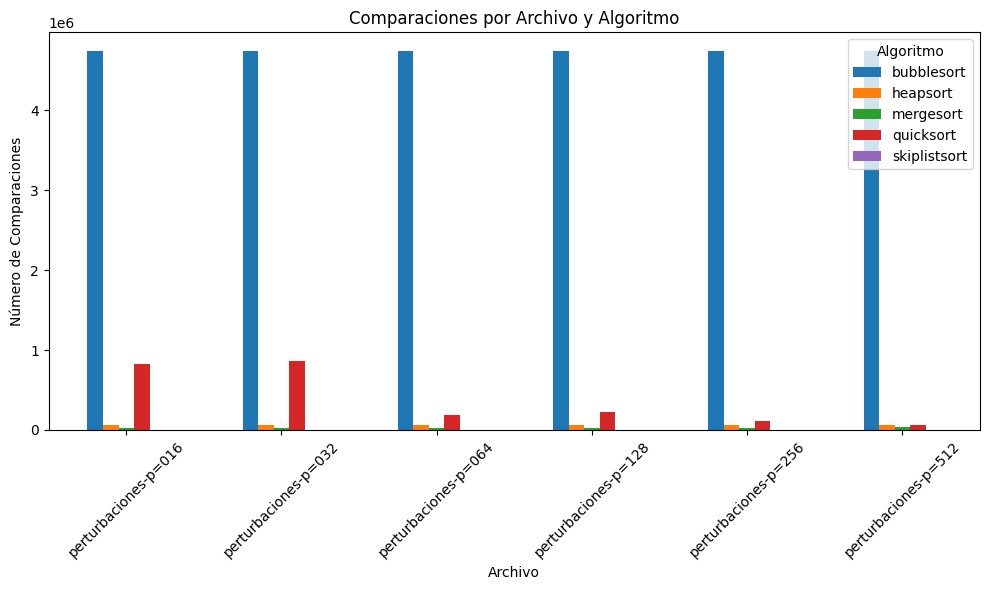

In [ ]:
display(tabla_comparaciones)
plot_barchart(tabla_comparaciones, "Comparaciones por Archivo y Algoritmo", "Número de Comparaciones")


### Tabla de Tiempos

Algorithm,bubblesort,heapsort,mergesort,quicksort,skiplistsort
File,,,,,
perturbaciones-p=016,0.265685,0.007803,0.004450,0.068820,0.033273
perturbaciones-p=032,0.307313,0.007571,0.005570,0.068720,0.011753
perturbaciones-p=064,0.244071,0.007255,0.004545,0.011471,0.011337
perturbaciones-p=128,0.273925,0.007136,0.004717,0.017832,0.105744
perturbaciones-p=256,0.276331,0.008749,0.004862,0.006334,0.014385
perturbaciones-p=512,0.299039,0.006739,0.005126,0.004216,0.013200


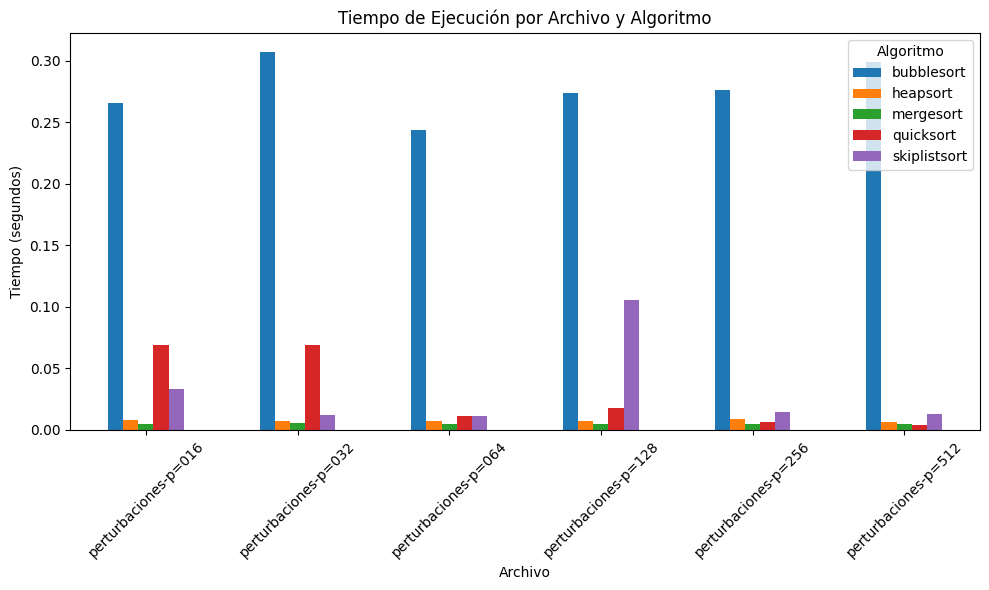

In [ ]:
display(tabla_tiempos)
plot_barchart(tabla_tiempos, "Tiempo de Ejecución por Archivo y Algoritmo", "Tiempo (segundos)")

-----

 ## **Punto 3**
Por cada archivo de datos, **compara** todos los métodos implementados mediante figuras o tablas de datos (número de comparaciones y tiempo por separado).




-----

Para cada uno de los archivos de datos (*perturbaciones-p=016*, *perturbaciones-p=032*, *perturbaciones-p=064*, *perturbaciones-p=128*, *perturbaciones-p=256* y *perturbaciones-p=512*), se obtuvieron dos tipos de resultados: el **número de comparaciones** y el **tiempo de ejecución** (en segundos) que cada algoritmo requirió para ordenar la lista correspondiente. En las tablas y gráficas mostradas (ver imágenes provistas), se evidencia lo siguiente:

- **BubbleSort**:  
  - Generalmente presenta la **mayor** cantidad de comparaciones en todos los archivos, lo cual coincide con su complejidad teórica $O(n^2)$.  
  - En consecuencia, su tiempo de ejecución también tiende a ser elevado, sobre todo a medida que aumenta el tamaño y/o desorden de la lista.

- **HeapSort**:  
  - Su número de comparaciones se mantiene en un orden cercano a $O(n \log n)$, por lo que resulta más eficiente que BubbleSort en los archivos de mayor tamaño.  
  - En cuanto a tiempo, logra buenos resultados, aunque en algunos casos queda por detrás de QuickSort o MergeSort.

- **MergeSort**:  
  - Mantiene un comportamiento **consistente** de $O(n \log n)$ en la mayoría de los casos, tanto en comparaciones como en tiempo.  
  - Presenta un rendimiento estable incluso para listas muy desordenadas, pues divide el problema en sublistas y luego fusiona ordenadamente (Fosdick & Cline, 1974).

- **QuickSort**:  
  - Muestra, en general, uno de los mejores promedios de tiempo, especialmente en listas con perturbaciones medianas o grandes, confirmando su naturaleza de $O(n \log n)$ promedio (Cook & Kim, 1980).  
  - Sin embargo, el número de comparaciones puede variar según la selección del pivote, aunque en estos experimentos se ve favorecido en la mayoría de los archivos.

- **SkipListSort** (uso de SkipList para ordenar):  
  - El número de comparaciones y el tiempo tienden a ser **moderados**, sin llegar a ser tan alto como BubbleSort ni tan bajo como QuickSort en la mayoría de los casos.  
  - Dado que la inserción en una SkipList es probabilística, puede ofrecer un desempeño cercano a $O(n \log n)$ (Pugh, 1990). Sin embargo, no siempre supera a QuickSort o MergeSort, ya que depende del patrón de inserción y de la generación aleatoria de niveles (Estivill-Castro & Wood, 1992).

En términos de **comparaciones**, BubbleSort sobresale negativamente por su alto conteo, mientras que QuickSort y MergeSort tienden a destacar por su eficiencia. Heapsort y SkipListSort se ubican en posiciones intermedias. Respecto al **tiempo de ejecución**, la tendencia es similar: BubbleSort es el más lento, QuickSort y MergeSort suelen ser los más rápidos, y Heapsort/SkipListSort mantienen un rendimiento aceptable en la mayoría de los casos.

---




## **Punto 4**
 **Discute** tus resultados.

-----

Los resultados experimentales confirman las **características teóricas** de cada algoritmo:

- **BubbleSort**, con complejidad $O(n^2)$, es poco recomendable para listas de gran tamaño o con alto desorden, ya que demanda un gran número de comparaciones y mayor tiempo de CPU.
- **MergeSort** y **QuickSort** validan su eficiencia de $O(n \log n)$. QuickSort, en particular, suele ser muy rápido para datos aleatorios o con cierto desorden, aunque en casos adversos (pivotes desfavorables) podría aumentar sus comparaciones. MergeSort, por su parte, ofrece un rendimiento constante al dividir y fusionar.
- **HeapSort** mantiene un comportamiento estable y eficiente en comparaciones y tiempo; sin embargo, no siempre alcanza los mejores resultados frente a QuickSort o MergeSort.
- **SkipListSort** se beneficia del uso probabilístico de niveles (Pugh, 1990). En la práctica, su rendimiento puede ser cercano al de los algoritmos $O(n \log n)$, pero la sobrecarga en la construcción y administración de la estructura puede hacerlo menos competitivo que QuickSort o MergeSort para algunos tamaños de lista.

En consonancia con estudios previos (Cook & Kim, 1980; Estivill-Castro & Wood, 1992), se observa que **ningún algoritmo es el “mejor” en todos los escenarios**. La elección depende tanto del tamaño de la lista como de su nivel de desorden. QuickSort y MergeSort suelen ser opciones sólidas para un rango amplio de situaciones. Si se sabe de antemano que las listas están casi ordenadas, algoritmos como InsertionSort o estructuras adaptativas (SkipLists) podrían tener un rendimiento aceptable, aunque en estos experimentos la comparación global muestra que QuickSort y MergeSort mantienen un balance más favorable en la mayoría de los casos.

---


## **Referencias**

- Cook, C. R., & Kim, D. J. (1980). Best sorting algorithm for nearly sorted lists. *Communications of the ACM, 23*(11), 620–628.  
- Estivill-Castro, V., & Wood, D. (1992). A survey of adaptive sorting algorithms. *ACM Computing Surveys, 24*(4), 441–476.  
- Fosdick, L. D., & Cline, A. K. (Eds.). (1974). *Some performance tests of “quicksort” and descendants*. Smithsonian Astrophysical Observatory.  
- Pugh, W. (1990). Skip lists: A probabilistic alternative to balanced trees. *Communications of the ACM, 33*(6), 668–676.

---